In [2]:
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### UCR Train

In [3]:
df = pd.read_csv("../data/df_ucr_apx_win_train.csv")

In [4]:
df.head()

,ts_name,type,fhat,PSD,freq,freq_apx_idx,freq_apx,no,class
0,DodgerLoopWeekend,fft,6423.000000,143246.28125,0.000000,0,0.000000,0,1
1,DodgerLoopWeekend,fft,2295.710044,18299.599331314348,0.003472,155,0.003548,0,1
2,DodgerLoopWeekend,fft,1021.794954,3625.225445525364,0.006944,185,0.007079,0,1
3,DodgerLoopWeekend,fft,795.464743,2197.0977681276645,0.010417,202,0.010471,0,1
4,DodgerLoopWeekend,fft,499.280639,865.5595721242706,0.013889,215,0.014125,0,1


In [44]:
df.shape

(52299556, 9)

In [ ]:
df_gby = df.groupby(['ts_name','no','type']).apply(lambda x: x.sort_values('PSD', ascending=False))

In [5]:
df_sv = df.sort_values(['ts_name','no','type','PSD'],
                       ascending=[True,True,True,False])\
.groupby(['ts_name','no','type']).head(5)

In [6]:
df_sv.shape

(846239, 9)

In [7]:
df_sv.head(10)

,ts_name,type,fhat,PSD,freq,freq_apx_idx,freq_apx,no,class
10406768,ACSF1,Hamming,0.010000,9.999555315686217e-05,0.367123,357,0.371535,0,9
10407156,ACSF1,Hamming,0.010000,9.999555315682446e-05,0.632877,381,0.645654,0,9
10407438,ACSF1,Hamming,0.009776,9.556510443168105e-05,0.826027,392,0.831764,0,9
10406486,ACSF1,Hamming,0.009776,9.556510443157482e-05,0.173973,325,0.177828,0,9
10406795,ACSF1,Hamming,0.009736,9.479092184793493e-05,0.385616,359,0.389045,0,9
10407710,ACSF1,Welch,NaN,(32.54447753535383+0j),0.246575,340,0.251189,0,9
10407728,ACSF1,Welch,NaN,(23.51384618880154+0j),0.493151,370,0.501187,0,9
10407709,ACSF1,Welch,NaN,(2.1766268837759997+0j),0.232877,337,0.234423,0,9
10407711,ACSF1,Welch,NaN,(14.221568740303479+0j),0.260274,342,0.263027,0,9
10407727,ACSF1,Welch,NaN,(0.4526535477924241+0j),0.479452,369,0.489779,0,9


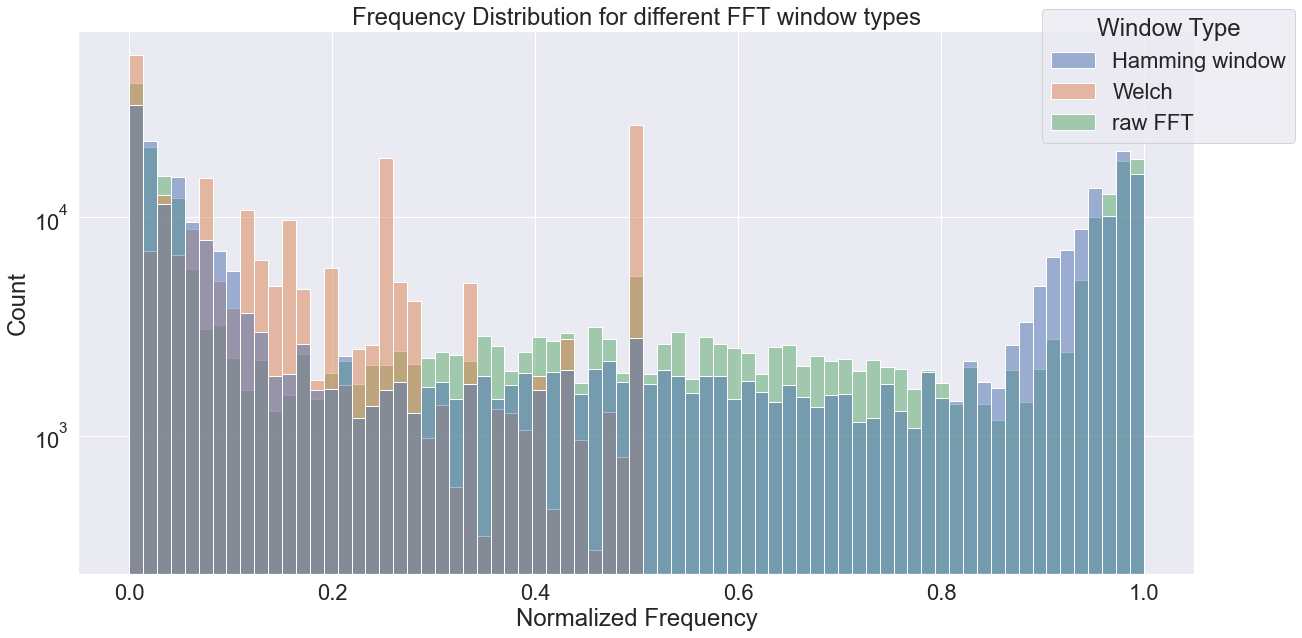

In [68]:
sns.set(font_scale=2)
fig, ax = plt.subplots(figsize=(20,10))

ax = sns.histplot(df_sv, x='freq', hue='type')
ax.set_xlabel('Normalized Frequency')
ax.set_yscale('log')
ax.set_title("Frequency Distribution for different FFT window types")
ax.legend_.set_title("Window Type")

labels = ['Hamming window', 'Welch', 'raw FFT']
for t, l in zip(ax.legend_.texts, labels):
    t.set_text(l)

sns.move_legend(ax, 'upper right', bbox_to_anchor=(1.1,1.06))
fig.savefig("../img/freq_dist_ucr.png")